In [2]:
#morphological trasformation

<b>Morphological Transformations</b><br><br>
A morphological transformation consists of a set of simple image operations based on
an image shape, and they are usually used on binary images. They are commonly used
to differentiate text from the background or any other shapes. They need two inputs,
one being the original image, and the other is called the structuring element or kernel,
which decides the nature of the operation. The kernel is usually a matrix that slides
through the image, multiplying its values by the values of the pixels of the image. Two
basic morphological operators are erosion and dilation. Their variant forms are opening
and closing. The one that should be used depends on the task at hand:<br>
• Erosion: <br>When given a binary image, it shrinks the thickness by one pixel both on
the interior and the exterior of the image, which is represented by white pixels.
This method can be applied several times. It can be used for different reasons,
depending on what you want to achieve, but normally it is used with dilation
(which is explained in figure) in order to get rid of holes or noise. An example
of erosion is shown here with the same digit, 3:

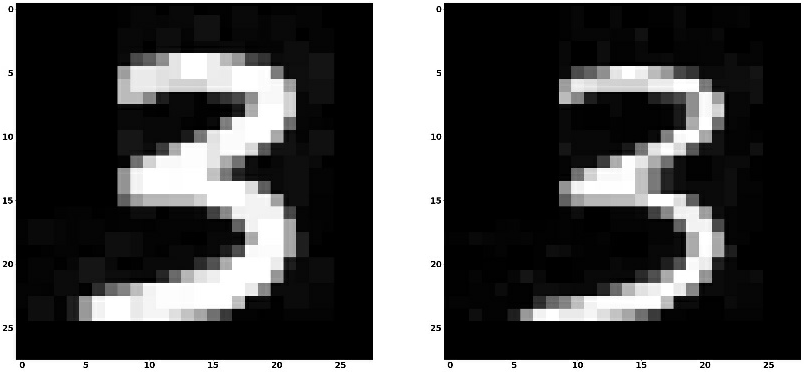

• Dilation:<br> This method does the opposite of erosion. It increases the thickness of
the object in a binary image by one pixel both on the interior and the exterior.
It can also be applied to an image several times. This method can be used for
different reasons, depending on what you want to achieve, but normally it is
implemented along with erosion in order to get rid of holes in an image or noise.
An example of dilation is shown here (we have implemented dilation on the image
several times):

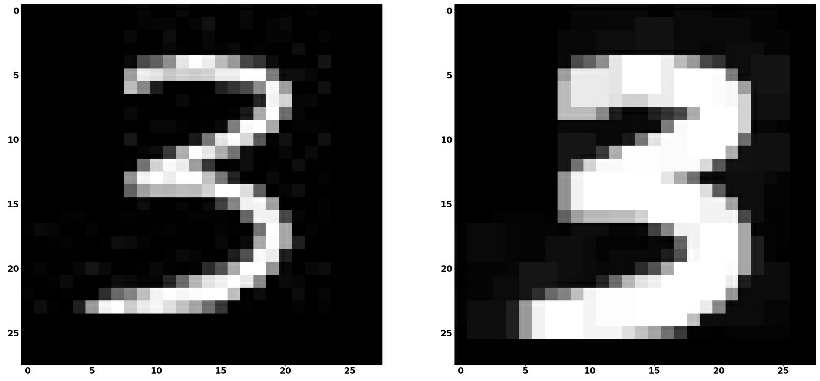

• Opening:<br> This method performs erosion first, followed by dilation, and it is usually
used for removing noise from an image.<br>
• Closing:<br> This algorithm does the opposite of opening, as it performs dilation first
before erosion. It is usually used for removing holes within an object:

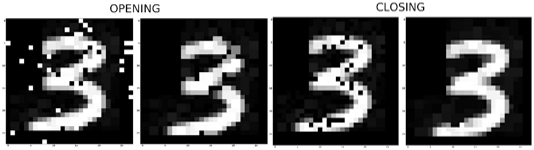

As you can see, the opening method removes random noise from the image and the
closing method works perfectly in fixing the small random holes within the image. In
order to get rid of the holes of the output image from the opening method, a closing
method could be applied.
There are more binary operations, but these are the basic ones.

<b>Applying the Various Morphological Transformations to an Image</b><br>

Import the OpenCV, Matplotlib, and NumPy libraries. NumPy here is the
fundamental package for scientific computing with Python and will help us create
the kernels applied:

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Now we are going to process in grayscale using OpenCV and show using Matplotlib:

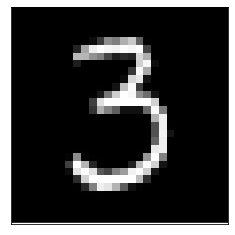

In [6]:
img = cv2.imread('three.png',0)#you can collect three.png image from image_gallery
plt.imshow(img,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.savefig('ex2_1.jpg', bbox_inches='tight')
plt.show()

Let's apply erosion by using OpenCV methods.
The method used here is cv2.erode, and it takes three parameters: the image, a
kernel that slides through the image, and the number of iterations, which is the
number of times that it is executed:

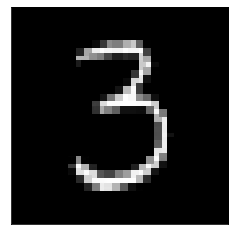

In [10]:
kernel = np.ones((2,2),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 3)
plt.imshow(erosion,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.savefig('ex2_2.jpg', bbox_inches='tight')
plt.show()

As we can see, the thickness of the figure has decreased.

We are going to do the same with dilation.<br>
The method used here is cv2.dilate, and it takes three parameters: the image, the
kernel, and the number of iterations:

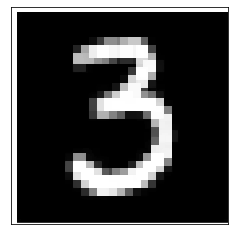

In [11]:
kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 5)
plt.imshow(dilation,cmap='gray')
plt.xticks([]),plt.yticks([])
plt.savefig('ex2_3.jpg', bbox_inches='tight')
plt.show()

As we can see, the thickness of the figure has increased.

Finally, let's put opening and closing into practice.
The method used here is cv2.morphologyEx, and it takes three parameters: the
image, the method applied, and the kernel:

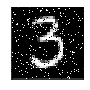

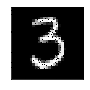

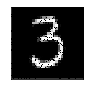

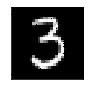

In [15]:
import random
random.seed(42)
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

def sp_noise_on_figure(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                if image[i][j] > 100:
                    output[i][j] = 0
            else:
                output[i][j] = image[i][j]
    return output
kernel = np.ones((2,2),np.uint8)

# Create thicker figure to work with
dilation = cv2.dilate(img, kernel, iterations = 1)
# Create noisy image
noise_img = sp_noise(dilation,0.05)
# Create image with noise in the figure
noise_img_on_image = sp_noise_on_figure(dilation,0.15)
# Apply Opening to image with normal noise
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
# Apply Closing to image with noise in the figure
closing = cv2.morphologyEx(noise_img_on_image, cv2.MORPH_CLOSE, kernel)
images = [noise_img,opening,noise_img_on_image,closing]
for i in range(4):
    plt.subplot(1,4,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
    plt.savefig('ex2_4.jpg', bbox_inches='tight')
    plt.show()